In [9]:
import pandas as pd
import numpy as np
from typing import List

from wordcloud import WordCloud

import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
recipes_path = "../data/full_dataset.csv"

recipes_data = pd.read_csv(
    recipes_path,
    index_col=0,
    usecols=["title", "link", "NER"],
    dtype={
        "title": "string[pyarrow]",
        "link": "string[pyarrow]",
        "NER": "string[pyarrow]",
    },
)

print(f" data shape: {recipes_data.shape}")
print(recipes_data.memory_usage(deep=True))

recipes_data.sample()

 data shape: (2231142, 2)
Index     62301530
link     127936022
NER      258246374
dtype: int64


,link,NER
title,,
Skillet Pecan Rice,www.food.com/recipe/skillet-pecan-rice-365284,"[""rice"", ""red bell pepper"", ""onion"", ""fresh mu..."


After inspecting some websites and checking what extra information about recipes they may hold:

'www.allrecipes.com' has ~60 K recipes, where I could get hold of more features related to nutrition facts.

In [6]:
filtered_data = recipes_data.query(
    f" link.str.contains('allrecipes.com') "
).copy()

# remove the double quotes around the lists in teh NER column:
filtered_data.NER = filtered_data.NER.apply(eval)

filtered_data.shape

(64603, 2)

In [7]:
all_ingredients = filtered_data.NER.explode()

ingredients_frequency = all_ingredients.value_counts().to_dict()

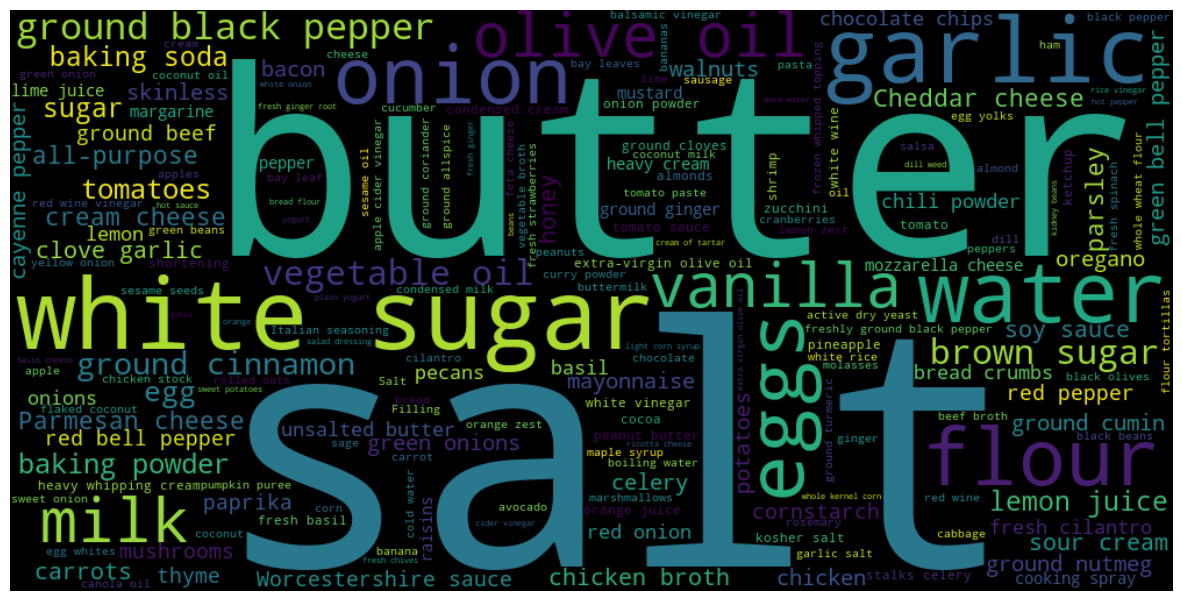

In [8]:
wordcloud = WordCloud(width=1000, height=500).generate_from_frequencies(
    ingredients_frequency
)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()